In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import Table, ColumnDefinition
from plottable.plots import percentile_bars, image

## Load data


In [2]:
df = (pd.read_excel("The_World's_Highest_Paid_Athletes.xlsx")
      .assign(OFEP = lambda x: x["Off-the-Field Earnings"].div(x["Total Earnings"]).mul(100),
              icon = lambda x: x["Sport"] + ".png")
      .rename(columns={"OFEP": "Off-the-Field Earnings Perc"})
      )

In [3]:
df = (df[[x for x in df if not x.endswith("Earnings")]]
      .join(df.filter(regex ="Earnings$")
            .div(1_000_000)
            .round(1))
      )

In [4]:
columns = ['Rank', 'Name', 'icon','Sport', 'Total Earnings', 'Off-the-Field Earnings', 'Off-the-Field Earnings Perc']
data = df[columns].nlargest(10, 'Total Earnings').set_index("Rank")
data

,Name,icon,Sport,Total Earnings,Off-the-Field Earnings,Off-the-Field Earnings Perc
Rank,,,,,,
1,Cristiano Ronaldo,Soccer.png,Soccer,136.0,90.0,66.176471
2,Lionel Messi,Soccer.png,Soccer,130.0,65.0,50.000000
3,Kylian Mbappé,Soccer.png,Soccer,120.0,20.0,16.666667
4,LeBron James,Basketball.png,Basketball,119.5,75.0,62.761506
5,Canelo Alvarez,Boxing.png,Boxing,110.0,10.0,9.090909
6,Dustin Johnson,Golf.png,Golf,107.0,5.0,4.672897
7,Phil Mickelson,Golf.png,Golf,106.0,2.0,1.886792
8,Stephen Curry,Basketball.png,Basketball,100.4,52.0,51.792829
9,Roger Federer,Tennis.png,Tennis,95.1,95.0,99.894848


## Visualise

In [9]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
title_font = font_manager.FontProperties(fname='Inter-Black.ttf')
subtitle_font = font_manager.FontProperties(fname='Inter-Regular.ttf')

# set custom font
plt.rcParams["font.family"] = ["Ubuntu"]

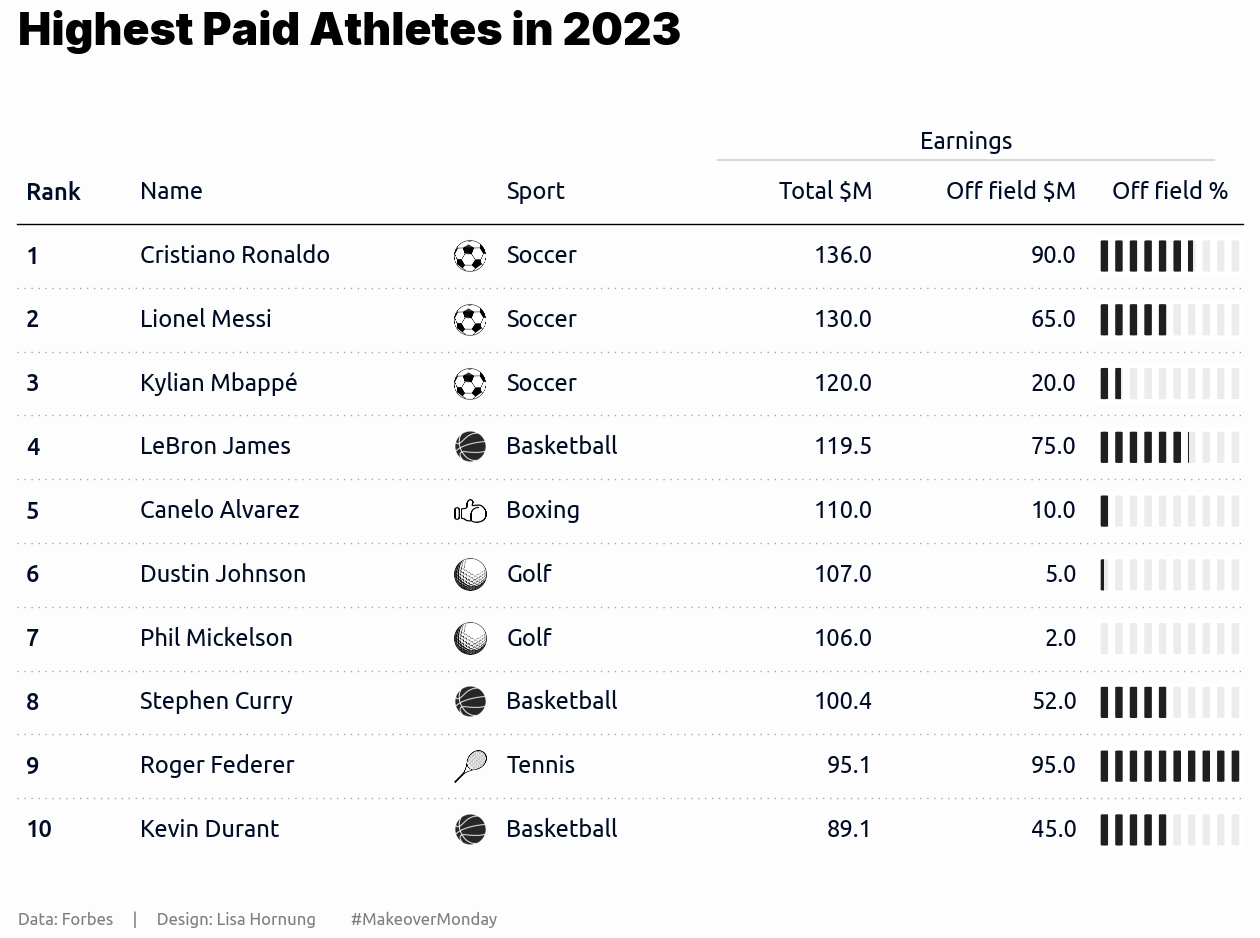

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))

bg_color="#fdfdfd"
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

tab = Table(
    data,
    ax=ax,
    cell_kw={"linewidth": 0, "edgecolor": "k"}, 
    textprops={"fontsize": 17, "color": "#000C26"},
    column_definitions=[
        ColumnDefinition("Rank", textprops={"ha": "left", "fontweight":"semibold"}, width=0.3,),
        ColumnDefinition("Name", textprops={"ha": "left"}, width=1.2),
        ColumnDefinition("icon", title="", textprops={"ha": "center"}, plot_fn=image, width=0.11),
        ColumnDefinition("Sport", textprops={"ha": "left"}, width=0.7),
        # Earnings
        ColumnDefinition("Total Earnings", title="Total $M", textprops={"ha": "right"}, width=0.7, group="Earnings"),
        ColumnDefinition("Off-the-Field Earnings", title="Off field $M", textprops={"ha": "right"}, width=0.7, group="Earnings"),
        ColumnDefinition("Off-the-Field Earnings Perc", title="Off field %", textprops={"ha": "right"},
                         width=0.5, plot_fn=percentile_bars, plot_kw={"color": "#1F1F1F", "background_color":"#ececec", "rect_kw":{"linewidth":5}},
                         group="Earnings"),
    ],
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 4)), "color": "#9EA7A9",}
)

# title
plt.figtext(0.13,0.93, "Highest Paid Athletes in 2023", fontproperties = title_font, fontsize=32, ha="left")
plt.figtext(0.13,0.05, "Data: Forbes     |     Design: Lisa Hornung         #MakeoverMonday ", fontsize=12, ha="left", alpha=0.5)

plt.savefig("table-test.png", pad_inches=1.1, bbox_inches='tight',)